In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy.linalg import pinv

np.set_printoptions(precision=2) #floating point numbers=2
#or np.set_printoptions(formatter={'all': lambda x: '%.2f' %x})

In [3]:
def load_data(fname='C:\\Users\\Nazli\\OneDrive\\Desktop\\truck.txt'): #fname is a path actually
    data = np.genfromtxt(fname, delimiter=',') #generate a matrix via a text file #fname itself is required
    X = data[:, 0].reshape(-1, 1) #1st column of data into a 2d matrix
    y = data[:, 1].reshape(-1, 1) #2nd column of data into a 2d matrix
    return X, y

X, y = load_data(fname='C:\\Users\\Nazli\\OneDrive\\Desktop\\truck.txt')
print(X.shape)
print(y.shape)
print('X = Population of City in 10,000\n', X, '\n*********\n', 'y = Profit in $10,000s\n', y)

(97, 1)
(97, 1)
X = Population of City in 10,000
 [[ 6.11]
 [ 5.53]
 [ 8.52]
 [ 7.  ]
 [ 5.86]
 [ 8.38]
 [ 7.48]
 [ 8.58]
 [ 6.49]
 [ 5.05]
 [ 5.71]
 [14.16]
 [ 5.73]
 [ 8.41]
 [ 5.64]
 [ 5.38]
 [ 6.37]
 [ 5.13]
 [ 6.43]
 [ 7.07]
 [ 6.19]
 [20.27]
 [ 5.49]
 [ 6.33]
 [ 5.56]
 [18.95]
 [12.83]
 [10.96]
 [13.18]
 [22.2 ]
 [ 5.25]
 [ 6.59]
 [ 9.25]
 [ 5.89]
 [ 8.21]
 [ 7.93]
 [ 8.1 ]
 [ 5.61]
 [12.84]
 [ 6.35]
 [ 5.41]
 [ 6.88]
 [11.71]
 [ 5.77]
 [ 7.82]
 [ 7.09]
 [ 5.07]
 [ 5.8 ]
 [11.7 ]
 [ 5.54]
 [ 7.54]
 [ 5.31]
 [ 7.42]
 [ 7.6 ]
 [ 6.33]
 [ 6.36]
 [ 6.27]
 [ 5.64]
 [ 9.31]
 [ 9.45]
 [ 8.83]
 [ 5.18]
 [21.28]
 [14.91]
 [18.96]
 [ 7.22]
 [ 8.3 ]
 [10.24]
 [ 5.5 ]
 [20.34]
 [10.14]
 [ 7.33]
 [ 6.01]
 [ 7.23]
 [ 5.03]
 [ 6.55]
 [ 7.54]
 [ 5.04]
 [10.27]
 [ 5.11]
 [ 5.73]
 [ 5.19]
 [ 6.36]
 [ 9.77]
 [ 6.52]
 [ 8.52]
 [ 9.18]
 [ 6.  ]
 [ 5.52]
 [ 5.06]
 [ 5.71]
 [ 7.64]
 [ 5.87]
 [ 5.31]
 [ 8.29]
 [13.39]
 [ 5.44]] 
*********
 y = Profit in $10,000s
 [[17.59]
 [ 9.13]
 [13.66]
 [11.85]
 [ 6

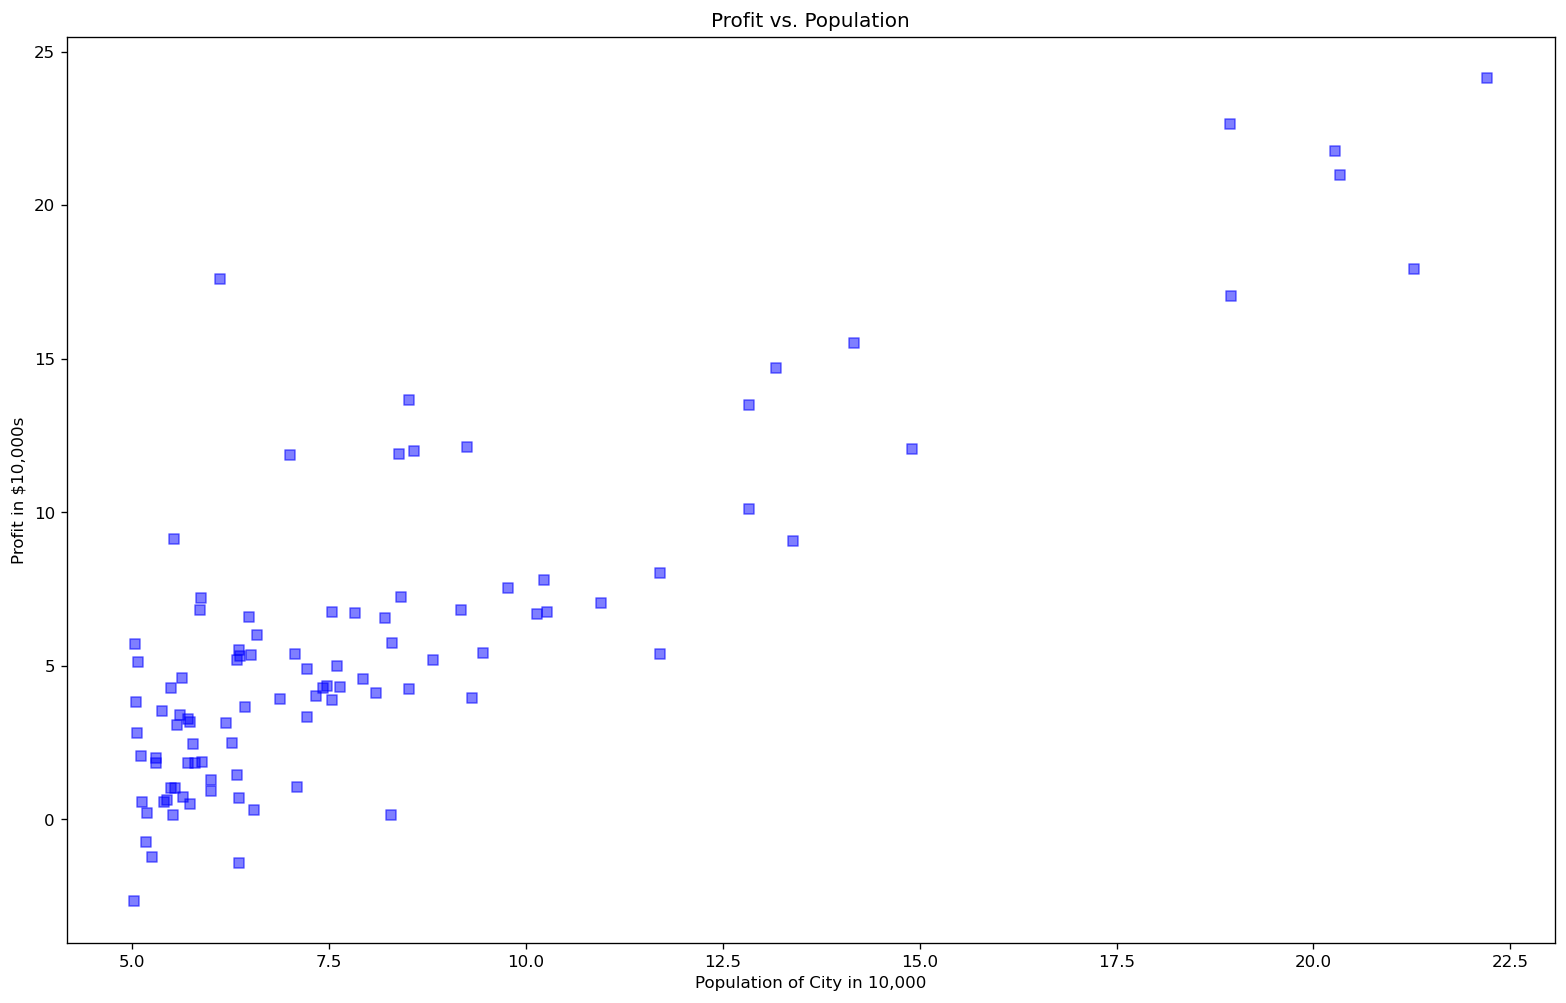

In [4]:
def plot_data(X, y):
    plt.figure(figsize=(16, 10), dpi=120)
    plt.scatter(X, y, s=30, c='blue', marker='s', alpha=0.5)
    plt.xlabel('Population of City in 10,000')
    plt.ylabel('Profit in $10,000s')   
    plt.title('Profit vs. Population')

plot_data(X, y)

In [5]:
#hypothesis function
def hypoth(X, theta):
    """Hypothesis function for linear regression.
    Arguments:
    - X: Input matrix, a 2d matrix of shape(m, n+1) *m is number of examples and n is number of features*
    - theta: Parameters, a 2d matrix of shape(n+1, 1)
    Output:
    - Predictions for input data(m-by-1)"""
    
    return X @ theta #x*theta+b(=0)

In [6]:
#prepare data
X = np.c_[np.ones((X.shape[0], 1)), X] #add the column of ones to the left of X
theta = np.zeros((2, 1)) #theta=0
alpha = 0.01
num_iterations = 2022
print(X)
print(theta)

[[ 1.    6.11]
 [ 1.    5.53]
 [ 1.    8.52]
 [ 1.    7.  ]
 [ 1.    5.86]
 [ 1.    8.38]
 [ 1.    7.48]
 [ 1.    8.58]
 [ 1.    6.49]
 [ 1.    5.05]
 [ 1.    5.71]
 [ 1.   14.16]
 [ 1.    5.73]
 [ 1.    8.41]
 [ 1.    5.64]
 [ 1.    5.38]
 [ 1.    6.37]
 [ 1.    5.13]
 [ 1.    6.43]
 [ 1.    7.07]
 [ 1.    6.19]
 [ 1.   20.27]
 [ 1.    5.49]
 [ 1.    6.33]
 [ 1.    5.56]
 [ 1.   18.95]
 [ 1.   12.83]
 [ 1.   10.96]
 [ 1.   13.18]
 [ 1.   22.2 ]
 [ 1.    5.25]
 [ 1.    6.59]
 [ 1.    9.25]
 [ 1.    5.89]
 [ 1.    8.21]
 [ 1.    7.93]
 [ 1.    8.1 ]
 [ 1.    5.61]
 [ 1.   12.84]
 [ 1.    6.35]
 [ 1.    5.41]
 [ 1.    6.88]
 [ 1.   11.71]
 [ 1.    5.77]
 [ 1.    7.82]
 [ 1.    7.09]
 [ 1.    5.07]
 [ 1.    5.8 ]
 [ 1.   11.7 ]
 [ 1.    5.54]
 [ 1.    7.54]
 [ 1.    5.31]
 [ 1.    7.42]
 [ 1.    7.6 ]
 [ 1.    6.33]
 [ 1.    6.36]
 [ 1.    6.27]
 [ 1.    5.64]
 [ 1.    9.31]
 [ 1.    9.45]
 [ 1.    8.83]
 [ 1.    5.18]
 [ 1.   21.28]
 [ 1.   14.91]
 [ 1.   18.96]
 [ 1.    7.22]
 [ 1.    8

In [8]:
def compute_cost(X, y, theta):
    """Vectorized implementation of MSE cost function.
    Arguments:
        - X: Inputs, a 2d matrix of shape(m, n+1) *m is number of examples and n is number of features*
        - y: Target values, a 2d matrix of shape(m, 1)
        - theta: Parameters, a 2d matrix of shape(n+1, 1)
    Outputs:
        - the mean squared error value"""
    
    errors = hypoth(X, theta) - y
    return np.mean(0.5 * (errors ** 2)) #cost function = MSE
    
print('J([0, 0]) = %.2f' %compute_cost(X, y, theta)) #theta=0 & b=0

J([0, 0]) = 32.07


In [9]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    """A vectorized implementation of full-batch gradient descent.
    Arguments:
        - X: Inputs, a 2d matrix of shape(m, n+1) *m is number of examples and n is number of features*
        - y: Target values, a 2d matrix of shape(m, 1)
        - theta: Initial guess for parameters, a 2d matrix of shape(n+1, 1)
        - alpha: Learning rate (or step size) in G.D. algorithm
        - num_iterations: Maximum number of iterations in G.D. algorithm
    Outputs:
        - theta: the final value of parameters after learning"""
    
    m, n = X.shape
    for iteration in range(num_iterations):
        cost = compute_cost(X, y, theta) #compute cost for current value of paremetrs
        if iteration % 100 == 0: #print cost every 100 iterations
            print('%4d: J(%s) = %.2f' %(iteration, theta.ravel(), cost))
        
        #compute gradients
        grads = np.zeros_like(theta) 
        errors = hypoth(X, theta) - y
        grads += X.T @ errors
        
        #update parameters
        theta = theta - (alpha / m) * grads  
            
    return theta

Cost = 6.66
   0: J([-0.76  1.06]) = 6.66
 100: J([-1.29  0.93]) = 5.09
 200: J([-1.72  0.97]) = 4.91
 300: J([-2.08  1.01]) = 4.78
 400: J([-2.38  1.04]) = 4.69
 500: J([-2.63  1.07]) = 4.62
 600: J([-2.84  1.09]) = 4.58
 700: J([-3.01  1.1 ]) = 4.55
 800: J([-3.16  1.12]) = 4.53
 900: J([-3.28  1.13]) = 4.51
1000: J([-3.38  1.14]) = 4.50
1100: J([-3.47  1.15]) = 4.49
1200: J([-3.54  1.16]) = 4.49
1300: J([-3.6   1.16]) = 4.49
1400: J([-3.65  1.17]) = 4.48
1500: J([-3.69  1.17]) = 4.48
1600: J([-3.72  1.18]) = 4.48
1700: J([-3.75  1.18]) = 4.48
1800: J([-3.77  1.18]) = 4.48
1900: J([-3.79  1.18]) = 4.48
2000: J([-3.81  1.18]) = 4.48

theta = [-3.81  1.18]

Prediction for 7.5 is: 5.07
Prediction for 10.0 is: 8.03


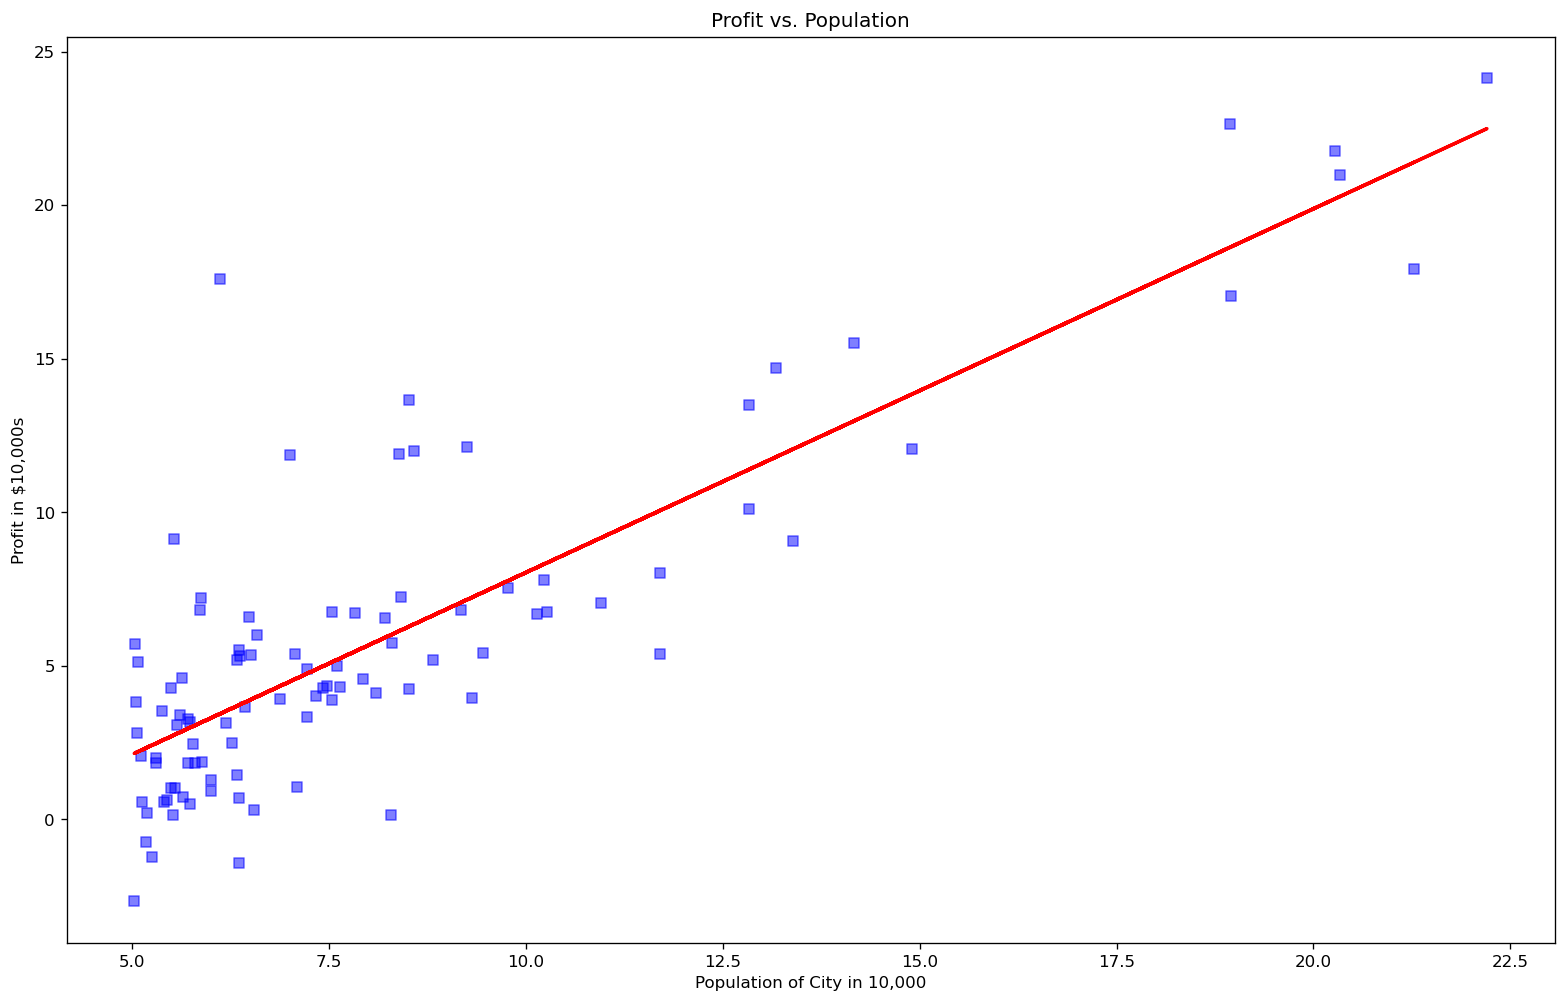

In [46]:
def one_variable_linear_regression():
    
    #load and prepare data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\truck.txt')
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    #initialization
    theta = np.random.randn(2, 1)
    alpha = 0.01
    num_iterations = 2022
    
    #print cost for initial value of parameters
    cost = compute_cost(X, y, theta)
    print("Cost = %.2f" % cost)
    
    #run gradient descent algorithm
    theta = gradient_descent(X, y, theta, alpha, num_iterations)
    
    #print the final value of parameters after running G.D.
    print("\ntheta = %s" %theta.ravel())
    
    #predict for two different inputs
    prediction1 = np.array([1, 7.5]).dot(theta)
    prediction2 = np.array([1, 10.0]).dot(theta)
    print("\nPrediction for 7.5 is: %.2f" % prediction1)
    print("Prediction for 10.0 is: %.2f" % prediction2)
    
    #plot data and the fit
    plot_data(X[:, 1], y)
    plt.plot(X[:, 1], X @ theta, 'r-', linewidth=2, markersize=50)
    plt.show()
    
one_variable_linear_regression()    

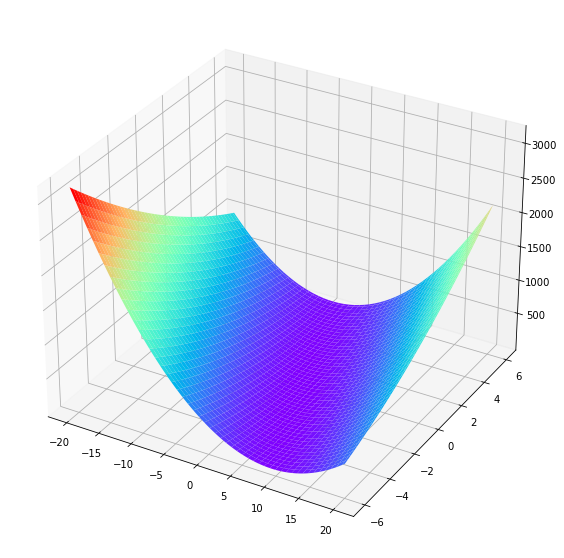

   0: J([20.  6.]) = 2167.76
 100: J([15.46 -0.75]) = 38.57
 200: J([12.26 -0.43]) = 28.24
 300: J([ 9.59 -0.16]) = 21.05
 400: J([7.37 0.06]) = 16.03
 500: J([5.51 0.25]) = 12.53
 600: J([3.96 0.4 ]) = 10.09
 700: J([2.66 0.53]) = 8.39
 800: J([1.58 0.64]) = 7.20
 900: J([0.67 0.73]) = 6.38
1000: J([-0.08  0.81]) = 5.80
1100: J([-0.71  0.87]) = 5.40
1200: J([-1.24  0.93]) = 5.12
1300: J([-1.68  0.97]) = 4.93
1400: J([-2.04  1.01]) = 4.79
1500: J([-2.35  1.04]) = 4.70
1600: J([-2.6   1.06]) = 4.63
1700: J([-2.82  1.08]) = 4.58
1800: J([-2.99  1.1 ]) = 4.55
1900: J([-3.14  1.12]) = 4.53
2000: J([-3.27  1.13]) = 4.51


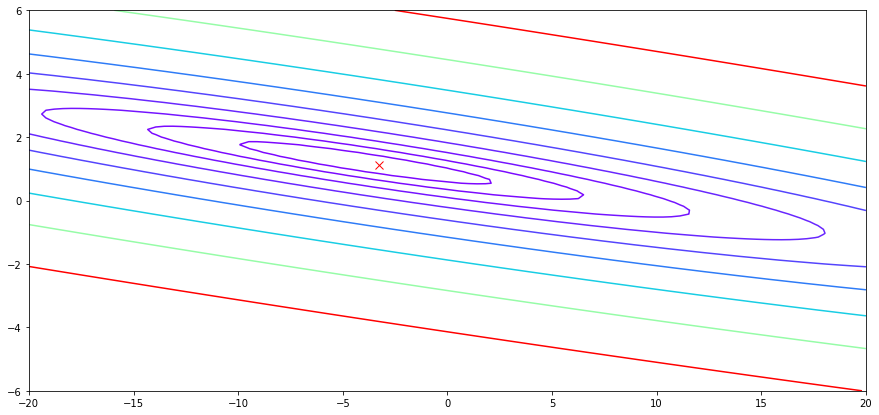

In [35]:
def visualize_cost():
    
    #load and prepare data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\truck.txt')
    X = np.c_[np.ones((X.shape[0], 1)), X]

    #compute cost function for a range of different values for parameters
    theta0_vals = np.linspace(-20, 20, 100)
    theta1_vals = np.linspace(-6, 6, 100)

    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)), dtype=np.float64)
    for i, v0 in enumerate(theta0_vals):
        for j, v1 in enumerate(theta1_vals):
            theta = np.array((theta0_vals[i], theta1_vals[j])).reshape(2, 1)
            J_vals[i, j] = compute_cost(X, y, theta)

    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

    #plot cost function
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(T0, T1, J_vals, cmap=plt.cm.rainbow)
    plt.show()

    #run gradient descent to find optimal theta
    theta = gradient_descent(X, y, theta, alpha, num_iterations)

    #plot contours of cost function and the final value of parameters
    fig = plt.figure(figsize=(15, 7))
    plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20), cmap=plt.cm.rainbow)
    plt.plot(theta[0], theta[1], 'rx', markersize=8)
    plt.show()

visualize_cost()

In [37]:
def feature_normalize(X):
    """A vectorized implementation of feature normalization.
    Arguments:
        - X: The raw input features, a 2d matrix of shape(m, n) *m is number of examples and n is number of features*
    Outputs:
        - X_norm: The normalized version of the input matrix
        - mu: The mean of the features
        - sigma: The std dev of the features"""
    
    x1 = X[:, 0] #size of the house (in square feet)
    x1_mu = np.mean(x1)
    x1_sigma = np.std(x1)
    x1_norm = (x1 - x1_mu) / x1_sigma
    
    x2 = X[:,1] #number of bedrooms
    x2_mu= np.mean(x2)
    x2_sigma = np.std(x2)
    x2_norm = (x2 - x2_mu) / x2_sigma
    
    X_norm = np.c_[x1_norm, x2_norm]
    mu = [x1_mu, x2_mu]
    sigma = [x1_sigma, x2_sigma]
    return X_norm, mu, sigma

In [38]:
def load_data(fname='C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt'):
    data = np.genfromtxt(fname, delimiter=',')
    n = data.shape[1] - 1            #number of features
    X = data[:, :-1].reshape(-1, n)  #Get all but the last column and convert to a 2d matrix
    y = data[:,  -1].reshape(-1, 1)  #Get the last column and convert to a 2d matrix
    return X, y

X, y = load_data(fname='C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt')
print(X.shape)
print(y.shape)
print('X =', X, '\n*********\n', 'y =', y)


(47, 2)
(47, 1)
X = [[2.10e+03 3.00e+00]
 [1.60e+03 3.00e+00]
 [2.40e+03 3.00e+00]
 [1.42e+03 2.00e+00]
 [3.00e+03 4.00e+00]
 [1.98e+03 4.00e+00]
 [1.53e+03 3.00e+00]
 [1.43e+03 3.00e+00]
 [1.38e+03 3.00e+00]
 [1.49e+03 3.00e+00]
 [1.94e+03 4.00e+00]
 [2.00e+03 3.00e+00]
 [1.89e+03 3.00e+00]
 [4.48e+03 5.00e+00]
 [1.27e+03 3.00e+00]
 [2.30e+03 4.00e+00]
 [1.32e+03 2.00e+00]
 [1.24e+03 3.00e+00]
 [2.61e+03 4.00e+00]
 [3.03e+03 4.00e+00]
 [1.77e+03 3.00e+00]
 [1.89e+03 2.00e+00]
 [1.60e+03 3.00e+00]
 [1.96e+03 4.00e+00]
 [3.89e+03 3.00e+00]
 [1.10e+03 3.00e+00]
 [1.46e+03 3.00e+00]
 [2.53e+03 3.00e+00]
 [2.20e+03 3.00e+00]
 [2.64e+03 3.00e+00]
 [1.84e+03 2.00e+00]
 [1.00e+03 1.00e+00]
 [2.04e+03 4.00e+00]
 [3.14e+03 3.00e+00]
 [1.81e+03 4.00e+00]
 [1.44e+03 3.00e+00]
 [1.24e+03 3.00e+00]
 [2.13e+03 4.00e+00]
 [4.22e+03 4.00e+00]
 [2.16e+03 4.00e+00]
 [1.66e+03 2.00e+00]
 [2.24e+03 3.00e+00]
 [2.57e+03 4.00e+00]
 [1.20e+03 3.00e+00]
 [8.52e+02 2.00e+00]
 [1.85e+03 4.00e+00]
 [1.20e+03 3.0

In [40]:
#let's look at first 5 noramalized features
def f5f():
    
    #load data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt')

    #feature normalization
    X_norm, mu, sigma = feature_normalize(X)
    
    #display the results
    print('Matrix X After Normalization:')
    print(X_norm[:5, :])
    
    print("mean = %s " %mu)
    print("std dev = %s" %sigma)
    
f5f()

Matrix X After Normalization:
[[ 0.13 -0.23]
 [-0.51 -0.23]
 [ 0.51 -0.23]
 [-0.74 -1.55]
 [ 1.27  1.1 ]]
mean = [2000.6808510638298, 3.1702127659574466] 
std dev = [786.2026187430467, 0.7528428090618781]


In [42]:
def compute_cost_multi(X, y, theta):
    """Vectorized implementation of MSE cost function.
    Arguments:
        - X: Inputs, a 2d matrix of shape(m, n+1) *m is number of examples and n is number of features*
        - y: Target values, a 2d matrix of shape(m, 1)
        - theta: Parameters, a 2d matrix of shape(n+1, 1)
    Outputs:
        - the mean squared error value"""
    
    errors = hypoth(X, theta) - y
    return np.mean(0.5 * (errors ** 2)) #cost = MSE

In [45]:
def gradient_descent_multi(X, y, theta, alpha, num_iterations):
    """A vectorized implementation of full-batch gradient descent.
    Arguments:
        - X: Inputs, a 2d matrix of shape(m, n+1)
        - y: Target values, a 2d matrix of shape(m, 1)
        - theta: Initial guess for parameters, a 2d matrix of shape(n+1, 1)
        - alpha: Learning rate (or step size) in G.D. algorithm
        - num_iterations: Maximum number of iterations in G.D. algorithm
        
    Outputs:
        - J_history: a list of computed costs during G.D. algorithm
        - theta: the final value of parameters after learning"""

    m, n = X.shape
    J_history = []
    for iteration in range(num_iterations):
        cost = compute_cost(X, y, theta) #compute cost for current value of paremetrs
        print('%4d: J(%s) = %.2f' %(iteration, theta.ravel(), cost))
        J_history.append(cost)
        
        #compute gradients
        grads = np.zeros_like(theta) 
        errors = hypoth(X, theta) - y
        grads += X.T @ errors
        
        #update parameters
        theta = theta - (alpha / m) * grads  
            
    return J_history, theta

   0: J([-1.25 -0.25  0.4 ]) = 65591979989.58
   1: J([3402.89 1057.39  547.49]) = 64298199854.86
   2: J([6772.98 2101.39 1083.18]) = 63031433788.04
   3: J([10109.38  3131.95  1607.67]) = 61791101755.44
   4: J([13412.41  4149.27  2121.14]) = 60576636608.44
   5: J([16682.42  5153.54  2623.78]) = 59387483785.21
   6: J([19919.72  6144.95  3115.78]) = 58223101019.75
   7: J([23124.65  7123.7   3597.3 ]) = 57082958057.95
   8: J([26297.53  8089.96  4068.52]) = 55966536380.53
   9: J([29438.68  9043.92  4529.62]) = 54873328932.65
  10: J([32548.42  9985.76  4980.77]) = 53802839860.07
  11: J([35627.06 10915.65  5422.14]) = 52754584251.64
  12: J([38674.92 11833.77  5853.88]) = 51728087888.03
  13: J([41692.29 12740.3   6276.16]) = 50722886996.45
  14: J([44679.5  13635.39  6689.15]) = 49738528011.31
  15: J([47636.83 14519.22  7092.99]) = 48774567340.54
  16: J([50564.59 15391.95  7487.85]) = 47830571137.62
  17: J([53463.07 16253.74  7873.87]) = 46906115078.97
  18: J([56332.56 17104.7

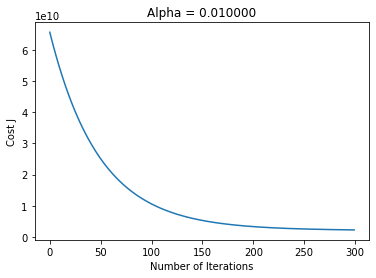

In [48]:
def multi_variable_linear_regression():
    
    #load data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt')
    
    #feature normalization
    X, mu, sigma = feature_normalize(X)
    
    #prepare data
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    #initialization
    theta = np.random.randn(3, 1)
    alpha = 0.01
    num_iterations = 300
    
    #run gradient descent algorithm
    J_history, theta = gradient_descent_multi(X, y, theta, alpha, num_iterations)
    
    #print the final value of parameters
    print('\ntheta = %s' %theta.ravel())
    
    #plot cost Vs. iteration
    plt.plot(J_history)
    plt.title("Alpha = %f" %(alpha))
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost J')
    plt.show()
    
multi_variable_linear_regression()

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([340.41 105.76  54.71]) = 65461556490.59
   2: J([680.48 211.39 109.3 ]) = 65331837660.04
   3: J([1020.22  316.88  163.78]) = 65202391025.94
   4: J([1359.61  422.24  218.15]) = 65073216000.72
   5: J([1698.66  527.46  272.41]) = 64944311998.13
   6: J([2037.38  632.54  326.55]) = 64815678433.24
   7: J([2375.75  737.49  380.58]) = 64687314722.42
   8: J([2713.79  842.31  434.49]) = 64559220283.33
   9: J([3051.49  946.98  488.29]) = 64431394534.96
  10: J([3388.85 1051.53  541.98]) = 64303836897.56
  11: J([3725.87 1155.94  595.56]) = 64176546792.71
  12: J([4062.56 1260.21  649.03]) = 64049523643.26
  13: J([4398.91 1364.35  702.38]) = 63922766873.36
  14: J([4734.92 1468.36  755.62]) = 63796275908.44
  15: J([5070.6  1572.23  808.76]) = 63670050175.21
  16: J([5405.94 1675.97  861.78]) = 63544089101.67
  17: J([5740.95 1779.58  914.68]) = 63418392117.07
  18: J([6075.62 1883.05  967.48]) = 63292958651.98
  19: J([6409.96 1986.39 1020.17]

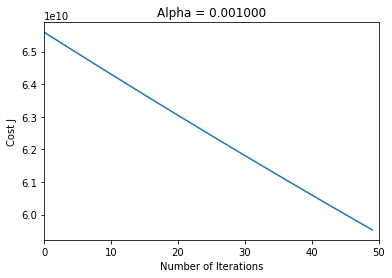

Predicted price = 13736.52

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([1021.24  317.29  164.13]) = 65201982879.11
   2: J([2039.41  633.36  327.23]) = 64814867416.79
   3: J([3054.53  948.2   489.31]) = 64430185873.13
   4: J([4066.61 1261.83  650.37]) = 64047922507.83
   5: J([5075.64 1574.24  810.43]) = 63668061685.97
   6: J([6081.66 1885.45  969.48]) = 63290587877.22
   7: J([7084.65 2195.46 1127.53]) = 62915485655.15
   8: J([8084.63 2504.27 1284.59]) = 62542739696.48
   9: J([9081.62 2811.89 1440.65]) = 62172334780.40
  10: J([10075.61  3118.33  1595.73]) = 61804255787.79
  11: J([11066.62  3423.58  1749.83]) = 61438487700.59
  12: J([12054.66  3727.66  1902.96]) = 61075015601.02
  13: J([13039.73  4030.58  2055.12]) = 60713824670.96
  14: J([14021.85  4332.33  2206.31]) = 60354900191.17
  15: J([15001.02  4632.91  2356.53]) = 59998227540.69
  16: J([15977.26  4932.35  2505.81]) = 59643792196.09
  17: J([16950.57  5230.64  2654.13]) = 59291579730.82
  18: J([17920.95  5527.78 

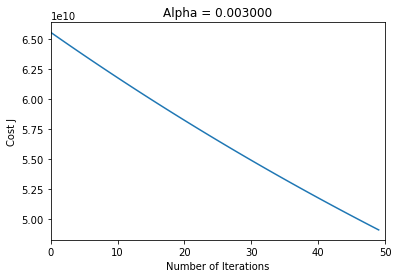

Predicted price = 39439.51

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([3404.13 1057.64  547.09]) = 64297776251.62
   2: J([6774.21 2101.64 1082.78]) = 63031018305.52
   3: J([10110.6   3132.2   1607.27]) = 61790694237.53
   4: J([13413.62  4149.52  2120.75]) = 60576236901.99
   5: J([16683.61  5153.79  2623.4 ]) = 59387091739.99
   6: J([19920.9   6145.21  3115.39]) = 58222716488.39
   7: J([23125.82  7123.95  3596.91]) = 57082580895.90
   8: J([26298.68  8090.21  4068.14]) = 55966166445.98
   9: J([29439.82  9044.17  4529.25]) = 54872966086.51
  10: J([32549.55  9986.01  4980.4 ]) = 53802483965.90
  11: J([35628.18 10915.9   5421.76]) = 52754235175.61
  12: J([38676.03 11834.02  5853.51]) = 51727745498.86
  13: J([41693.39 12740.55  6275.79]) = 50722551165.38
  14: J([44680.59 13635.64  6688.78]) = 49738198612.03
  15: J([47637.91 14519.47  7092.63]) = 48774244249.16
  16: J([50565.66 15392.2   7487.48]) = 47830254232.63
  17: J([53464.13 16253.99  7873.51]) = 46905804241.17
  18: 

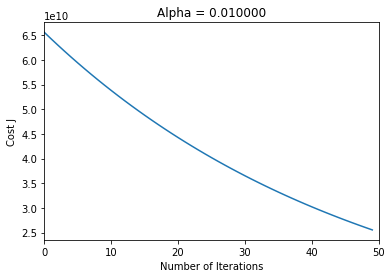

Predicted price = 113115.52

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([10212.38  3172.92  1641.26]) = 61751194567.52
   2: J([20118.39  6223.09  3179.99]) = 58148716772.69
   3: J([29727.22  9155.9   4621.31]) = 54768975704.92
   4: J([39047.78 11976.51  5970.13]) = 51597828017.54
   5: J([48088.73 14689.85  7231.09]) = 48622057904.91
   6: J([56858.44 17300.6   8408.65]) = 45829313849.67
   7: J([65365.07 19813.25  9507.02]) = 43208049880.79
   8: J([73616.5  22232.07 10530.23]) = 40747471005.03
   9: J([81620.38 24561.13 11482.12]) = 38437482501.15
  10: J([89384.15 26804.34 12366.31]) = 36268642790.07
  11: J([96915.01 28965.39 13186.3 ]) = 34232119616.80
  12: J([104219.94  31047.83  13945.39]) = 32319649300.16
  13: J([111305.72  33055.05  14646.72]) = 30523498825.37
  14: J([118178.93  34990.27  15293.29]) = 28836430571.53
  15: J([124845.94  36856.58  15887.95]) = 27251669482.46
  16: J([131312.94  38656.9   16433.42]) = 25762872503.41
  17: J([137585.93  40394.05  16932.29]

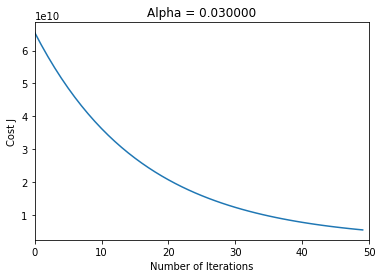

Predicted price = 228562.33

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([34041.27 10576.41  5470.88]) = 53268259941.69
   2: J([64678.41 19788.83  9802.43]) = 43389084347.20
   3: J([92251.83 27837.46 13184.96]) = 35457430400.19
   4: J([117067.91  34891.81  15778.54]) = 29080554650.27
   5: J([139402.39  41095.5   17717.74]) = 23947078942.49
   6: J([159503.42  46570.23  19115.64]) = 19809572950.41
   7: J([177594.34  51419.2   20067.18]) = 16471010836.84
   8: J([193876.17  55730.    20652.03]) = 13774203352.01
   9: J([208529.82  59576.97  20937.01]) = 11593524216.53
  10: J([221718.1   63023.28  20978.08]) = 9828412382.49
  11: J([233587.56  66122.66  20822.06]) = 8398254002.78
  12: J([244270.07  68920.84  20508.08]) = 7238340120.37
  13: J([253884.33  71456.79  20068.81]) = 6296665891.96
  14: J([262537.16  73763.73  19531.47]) = 5531390234.91
  15: J([270324.71  75870.07  18918.68]) = 4908815308.04
  16: J([277333.51  77800.1   18249.22]) = 4401776301.44
  17: J([283641.42  79

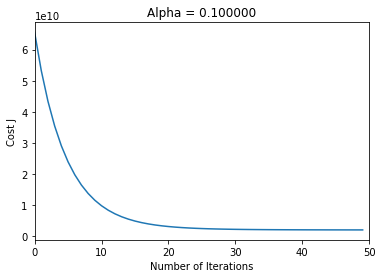

Predicted price = 292679.07

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([102123.8   31729.24  16412.65]) = 32717886169.54
   2: J([173610.46  51182.54  22571.3 ]) = 17125983502.03
   3: J([223651.12  63765.27  23614.39]) = 9586804547.64
   4: J([258679.58  72397.94  22230.78]) = 5887062669.06
   5: J([283199.5   78673.25  19812.05]) = 4046936937.87
   6: J([300363.45  83472.28  17064.75]) = 3118212254.47
   7: J([312378.21  87293.13  14335.45]) = 2640899133.33
   8: J([320788.55  90426.21  11783.08]) = 2389738226.71
   9: J([326675.78  93048.15   9470.09]) = 2253504329.51
  10: J([330796.84  95272.06   7410.53]) = 2176789165.54
  11: J([333681.59  97174.79   5595.25]) = 2131682522.01
  12: J([335700.91  98811.64   4004.91]) = 2103914142.11
  13: J([337114.44 100224.61   2616.7 ]) = 2086037788.21
  14: J([338103.9  101446.88   1407.59]) = 2074061172.98
  15: J([338796.53 102505.6     355.88]) = 2065768693.28
  16: J([339281.37 103423.37   -558.17]) = 2059879144.84
  17: J([339620.76 1

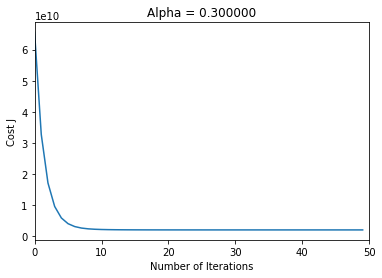

Predicted price = 293092.21

   0: J([0. 0. 0.]) = 65591548106.46
   1: J([340412.66 105764.13  54708.82]) = 3801704819.55
   2: J([340412.66  75128.99  -4515.62]) = 2594657471.09
   3: J([340412.66 108292.74  12639.05]) = 2216171757.54
   4: J([340412.66  98686.68  -5931.56]) = 2097492539.57
   5: J([340412.66 109085.61   -552.48]) = 2060279095.92
   6: J([340412.66 106073.51  -6375.54]) = 2048610326.84
   7: J([340412.66 109334.23  -4688.86]) = 2044951429.45
   8: J([340412.66 108389.74  -6514.76]) = 2043804133.62
   9: J([340412.66 109412.19  -5985.88]) = 2043444383.79
  10: J([340412.66 109116.03  -6558.41]) = 2043331579.45
  11: J([340412.66 109436.63  -6392.58]) = 2043296208.16
  12: J([340412.66 109343.77  -6572.1 ]) = 2043285117.02
  13: J([340412.66 109444.3   -6520.1 ]) = 2043281639.24
  14: J([340412.66 109415.18  -6576.39]) = 2043280548.74
  15: J([340412.66 109446.7   -6560.09]) = 2043280206.80
  16: J([340412.66 109437.57  -6577.74]) = 2043280099.58
  17: J([340412.66 109

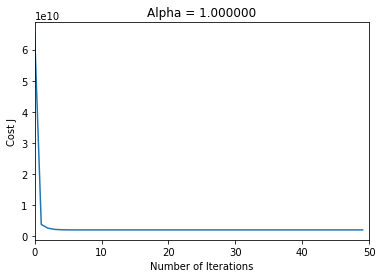

Predicted price = 293081.46



In [69]:
def multi_variable_linear_regression_alphas():
    
    #load data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt')
    
    #feature normalization
    X, mu, sigma = feature_normalize(X)

    #prepare data
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    #run gradient descent algorithm for a list of different learning rates
    alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]
    for alpha in alphas:
        theta = np.zeros((3, 1))
        num_iterations = 50
        J_history, theta = gradient_descent_multi(X, y, theta, alpha, num_iterations)

        #plot cost V.s iteration
        plt.plot(J_history)
        plt.title("Alpha = %f" %(alpha))
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost J')
        plt.xlim([0, 50])
        plt.show()

        #predict price for a 1650 sq feet 3 bedroom house
        x_test = np.array([1.0, 1650.0, 3.0])
        
        #exclude intercept units when normalizing
        x_test[1:] = (x_test[1:] - mu) / sigma
        prediction = x_test @ theta
        print('Predicted price = %.2f\n' %prediction[0])

multi_variable_linear_regression_alphas()

In [66]:
def normal_equation(X, y):
    return pinv(X.T @ X) @ X.T @ y

In [71]:
def NE():
    
    #load and prepare data
    X, y = load_data('C:\\Users\\Nazli\\OneDrive\\Desktop\\houses.txt')
    X = np.c_[np.ones((X.shape[0], 1)), X]

    #find theta using normal equation
    theta = normal_equation(X, y)
    
    #predict price for a 1650 sq feet 3 bedroom house
    x_test = np.array([1.0, 1650.0, 3.0])
    prediction = x_test @ theta
    print('Predicted price = %.2f' % prediction[0])
    
NE()

Predicted price = 293081.46
